In [1]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00:00:0100:01


In [2]:
import os
import torch
import yaml
import shutil
from pathlib import Path
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
DATASET_PATH = '/kaggle/input/ppe-detection-1/dataset_new'
WORKING_ROOT = '/kaggle/working/yolo_data'
OUTPUT_PATH = '/kaggle/working/output'

In [4]:
class_names = {
    0: 'person', 1: 'ear', 2: 'background', 3: 'face', 4: 'background',
    5: 'background', 6: 'background', 7: 'tool', 8: 'glasses', 9: 'gloves',
    10: 'helmet', 11: 'hand', 12: 'head', 13: 'background',
    14: 'shoes', 15: 'safety-suit', 16: 'safety-vest'
}

In [5]:
images_out_train = Path(WORKING_ROOT) / 'images' / 'train'
labels_out_train = Path(WORKING_ROOT) / 'labels' / 'train'
images_out_val = Path(WORKING_ROOT) / 'images' / 'val'
labels_out_val = Path(WORKING_ROOT) / 'labels' / 'val'

for path in [images_out_train, labels_out_train, images_out_val, labels_out_val]:
    path.mkdir(parents=True, exist_ok=True)

def copy_files(file_list, img_dir, lbl_dir, data_dir):
    with open(file_list, 'r') as f:
        files = f.readlines()
    for file in files:
        file = file.strip()
        img_file = f"{data_dir}/filtered_images/{file}"
        lbl_file = f"{data_dir}/filtered_labels/{file.rsplit('.', 1)[0]}.txt"
        if os.path.exists(img_file): shutil.copy(img_file, img_dir)
        if os.path.exists(lbl_file): shutil.copy(lbl_file, lbl_dir)

copy_files(f"{DATASET_PATH}/train_files.txt", images_out_train, labels_out_train, DATASET_PATH)
copy_files(f"{DATASET_PATH}/val_files.txt", images_out_val, labels_out_val, DATASET_PATH)


In [6]:
data_config = {
    'train': str(images_out_train),
    'val': str(images_out_val),
    'test': str(images_out_val),
    'nc': len(class_names),
    'names': class_names
}
with open('data.yaml', 'w') as f:
    yaml.safe_dump(data_config, f, sort_keys=False)

print(yaml.safe_dump(data_config, sort_keys=False))


train: /kaggle/working/yolo_data/images/train
val: /kaggle/working/yolo_data/images/val
test: /kaggle/working/yolo_data/images/val
nc: 17
names:
  0: person
  1: ear
  2: background
  3: face
  4: background
  5: background
  6: background
  7: tool
  8: glasses
  9: gloves
  10: helmet
  11: hand
  12: head
  13: background
  14: shoes
  15: safety-suit
  16: safety-vest



In [7]:
model = YOLO('yolov8l.pt')

train_args = dict(
    data='data.yaml',
    epochs=60,
    imgsz=768,
    batch=8,
    workers=4,
    augment=True,
    degrees=5.0,
    translate=0.1,
    scale=0.3,
    shear=2.0,
    fliplr=0.5,
    mosaic=0.9,
    mixup=0.1,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    perspective=0.0005,

    optimizer='AdamW',
    lr0=0.001,
    lrf=0.01,
    cos_lr=True,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,

    cache=True,
    save=True,
    save_period=10,
    patience=20,

    device='0',
    project='/kaggle/working',
    name='ppe_detection_kaggle_yolov8l',

    exist_ok=True,
    deterministic=True,
    half=True
)

100%|██████████| 83.7M/83.7M [00:00<00:00, 101MB/s] 


In [8]:
results = model.train(**train_args)
print("\nYOLOv8l training completed!")

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=0.9, multi_scale=False, name=ppe_detection_kaggle_yolov8l, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0.0005, plots=True, pose=12.0,

100%|██████████| 755k/755k [00:00<00:00, 39.7MB/s]


Overriding model.yaml nc=80 with nc=17

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 152MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1237.1±1585.6 MB/s, size: 1948.5 KB)


train: Scanning /kaggle/working/yolo_data/labels/train... 6006 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6006/6006 [00:06<00:00, 918.76it/s]


train: New cache created: /kaggle/working/yolo_data/labels/train.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (6.6GB RAM): 100%|██████████| 6006/6006 [11:19<00:00,  8.84it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 224.6±174.8 MB/s, size: 1183.7 KB)


val: Scanning /kaggle/working/yolo_data/labels/val... 1513 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1513/1513 [00:02<00:00, 600.42it/s]

val: New cache created: /kaggle/working/yolo_data/labels/val.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (1.7GB RAM): 100%|██████████| 1513/1513 [02:58<00:00,  8.50it/s]


Plotting labels to /kaggle/working/ppe_detection_kaggle_yolov8l/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 4 dataloader workers
Logging results to /kaggle/working/ppe_detection_kaggle_yolov8l
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      7.33G      1.435      1.472      1.569        120        768: 100%|██████████| 751/751 [09:07<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:34<00:00,  2.78it/s]


                   all       1513      13765      0.526      0.413      0.424       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      7.61G      1.456      1.412      1.594        103        768: 100%|██████████| 751/751 [08:59<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.88it/s]


                   all       1513      13765      0.604      0.426      0.458      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      7.49G      1.427      1.338      1.569         76        768: 100%|██████████| 751/751 [08:58<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.92it/s]


                   all       1513      13765      0.708      0.451      0.479      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      7.58G      1.373      1.252      1.532        112        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.92it/s]


                   all       1513      13765       0.63      0.462      0.502      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      7.58G      1.334      1.169      1.492        121        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.93it/s]


                   all       1513      13765      0.629      0.505      0.531      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      7.57G      1.304      1.121      1.472        141        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]


                   all       1513      13765      0.662      0.515      0.548      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      7.62G      1.279      1.078      1.455         93        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.93it/s]


                   all       1513      13765      0.764      0.486      0.544      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      7.61G      1.262      1.031      1.442        157        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]


                   all       1513      13765      0.672      0.538       0.57      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      7.57G       1.24       1.01      1.426        108        768: 100%|██████████| 751/751 [08:56<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]


                   all       1513      13765      0.692      0.524      0.572      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      7.68G      1.221     0.9907      1.414        103        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]

                   all       1513      13765      0.748      0.518      0.578       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      7.68G      1.209     0.9624      1.401         68        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]


                   all       1513      13765      0.742      0.551      0.581      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      7.55G      1.203     0.9391      1.394         92        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]


                   all       1513      13765      0.678      0.571      0.603      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      7.57G      1.183     0.9226      1.384         83        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]


                   all       1513      13765      0.728      0.565      0.605      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      7.57G      1.169     0.9067      1.378        114        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.93it/s]


                   all       1513      13765      0.725       0.58      0.612      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      7.49G      1.164     0.8936      1.366        111        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.742       0.57      0.627      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      7.56G      1.154     0.8735      1.359        104        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]

                   all       1513      13765      0.727      0.596      0.628      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60       7.5G      1.146     0.8596      1.354         99        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]

                   all       1513      13765      0.718      0.607      0.636      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      7.45G      1.136     0.8417      1.346        120        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.94it/s]

                   all       1513      13765      0.775      0.596      0.644      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      7.48G      1.123     0.8273      1.338        109        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.94it/s]

                   all       1513      13765      0.713      0.619      0.651      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      7.49G      1.115     0.8145      1.335        129        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]

                   all       1513      13765      0.697      0.609      0.642      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      7.45G      1.113     0.8121      1.332        166        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.775      0.617      0.663      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      7.72G      1.102     0.7946      1.324        118        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.97it/s]

                   all       1513      13765      0.774      0.604      0.659      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      7.49G      1.096     0.7892      1.313        121        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.724      0.633      0.664      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      7.62G      1.087     0.7705      1.308         73        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.94it/s]

                   all       1513      13765      0.724      0.635      0.667      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      7.48G      1.079     0.7646      1.306        166        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.97it/s]

                   all       1513      13765      0.784      0.623      0.674      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      7.56G      1.072     0.7521        1.3        152        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]

                   all       1513      13765      0.766      0.627      0.669       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      7.55G      1.065     0.7425      1.292         94        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.723      0.657      0.674      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      7.56G      1.063     0.7394       1.29        109        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.733       0.64      0.677      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      7.58G      1.045       0.72      1.281         89        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.763      0.642      0.685       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      7.48G      1.033     0.7114       1.27        123        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.731      0.677      0.702      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      7.46G      1.036     0.7046      1.272         76        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.97it/s]

                   all       1513      13765      0.722      0.666      0.692      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      7.55G      1.027     0.6948      1.265         63        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.97it/s]

                   all       1513      13765      0.788       0.65        0.7      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      7.56G      1.019     0.6835      1.255         59        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.775      0.654        0.7      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      7.47G      1.022     0.6855      1.263        121        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.97it/s]

                   all       1513      13765      0.818      0.639      0.698      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      7.56G      1.007      0.668       1.25        110        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]

                   all       1513      13765       0.79      0.651      0.703       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60       7.7G     0.9971     0.6585      1.245        115        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.765      0.683      0.719      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60       7.5G     0.9894     0.6475      1.237        120        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.779      0.642      0.703      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      7.79G     0.9843     0.6341      1.233         45        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.98it/s]

                   all       1513      13765      0.767      0.668      0.714      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      7.56G     0.9749     0.6294      1.226         76        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.809      0.663      0.723      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      7.55G     0.9691     0.6297      1.225         92        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.97it/s]

                   all       1513      13765      0.776      0.689      0.724      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      7.48G     0.9692     0.6262      1.225        129        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.769      0.686      0.724      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      7.56G     0.9593     0.6149      1.218         90        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.763      0.681      0.714       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      7.55G     0.9507     0.6023       1.21        148        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.808      0.672       0.73      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      7.58G     0.9419     0.5929      1.205        119        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.787      0.692      0.735      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      7.58G     0.9405     0.5937      1.206         63        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.98it/s]

                   all       1513      13765       0.78      0.682       0.73       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      7.51G     0.9374     0.5885      1.202         87        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.773      0.697      0.728      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      7.56G     0.9309     0.5759      1.192         68        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.98it/s]

                   all       1513      13765       0.77      0.693      0.729      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      7.56G     0.9242     0.5776      1.193         87        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.98it/s]

                   all       1513      13765      0.783      0.685      0.731      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      7.56G     0.9203     0.5689      1.193        132        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.796      0.683       0.73      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      7.46G     0.9113     0.5655      1.183         29        768: 100%|██████████| 751/751 [08:57<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.794      0.686      0.732      0.496


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      7.53G     0.7983     0.4094      1.092         47        768: 100%|██████████| 751/751 [08:56<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.799      0.685      0.729      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      7.46G     0.7867     0.3992      1.087         43        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.777      0.693      0.729      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      7.54G     0.7829     0.3953      1.081         52        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.789      0.684      0.728      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      7.54G     0.7772     0.3911      1.076         27        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.795      0.678      0.731      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      7.44G     0.7736     0.3877      1.072         50        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:32<00:00,  2.96it/s]

                   all       1513      13765      0.818      0.673      0.733      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      7.54G     0.7649     0.3818      1.067         33        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.814      0.676      0.731      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      7.54G     0.7643     0.3819      1.066         53        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.98it/s]

                   all       1513      13765      0.814      0.673      0.732      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      7.55G     0.7636     0.3801      1.067         63        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.822      0.671      0.733      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      7.69G     0.7599     0.3783      1.064        103        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.816       0.67       0.73      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      7.45G     0.7603      0.377      1.061         45        768: 100%|██████████| 751/751 [08:55<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:31<00:00,  2.97it/s]

                   all       1513      13765      0.795      0.684      0.732      0.498



60 epochs completed in 9.528 hours.
Optimizer stripped from /kaggle/working/ppe_detection_kaggle_yolov8l/weights/last.pt, 87.7MB
Optimizer stripped from /kaggle/working/ppe_detection_kaggle_yolov8l/weights/best.pt, 87.7MB

Validating /kaggle/working/ppe_detection_kaggle_yolov8l/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 112 layers, 43,619,715 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [01:07<00:00,  1.40it/s]


                   all       1513      13765       0.79      0.682      0.734      0.501
                person       1412       2504      0.871      0.889      0.915       0.75
                   ear        919       1485      0.925      0.769      0.846      0.547
                  face       1119       1809      0.953      0.892      0.935      0.713
                  tool        405        861      0.535      0.327      0.359      0.202
               glasses        287        351      0.809      0.715      0.746      0.438
                gloves        212        439      0.741       0.56      0.634      0.403
                helmet         82        134      0.789      0.641      0.729      0.501
                  hand       1222       3009      0.887      0.842      0.896      0.629
                  head       1215       2204      0.944      0.884      0.936      0.723
                 shoes        298        850      0.822      0.616      0.707      0.432
           safety-sui

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 39.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/ppe_detection_kaggle_yolov8l

YOLOv8l training completed!



image 1/1 /kaggle/input/ppe-detection-1/dataset_new/filtered_images/construction-site-build-construction-work-159375.jpeg: 512x768 1 person, 1 face, 1 tool, 1 gloves, 1 head, 2 shoess, 1 safety-vest, 201.2ms
Speed: 3.9ms preprocess, 201.2ms inference, 2.8ms postprocess per image at shape (1, 3, 512, 768)


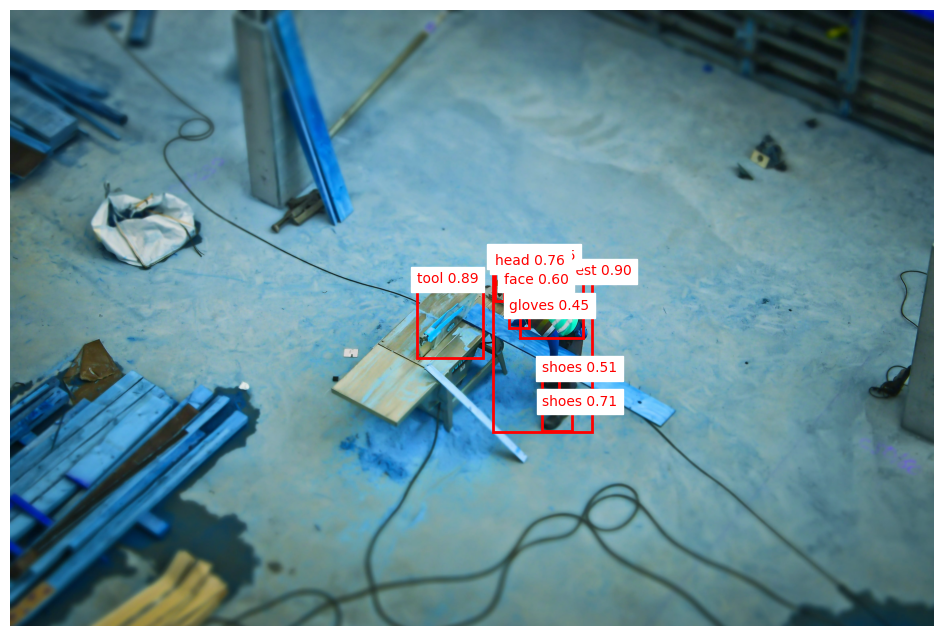


image 1/1 /kaggle/input/ppe-detection-1/dataset_new/filtered_images/floor-flooring-hand-man-1388944.jpeg: 480x768 2 persons, 1 tool, 2 hands, 123.6ms
Speed: 3.5ms preprocess, 123.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 768)


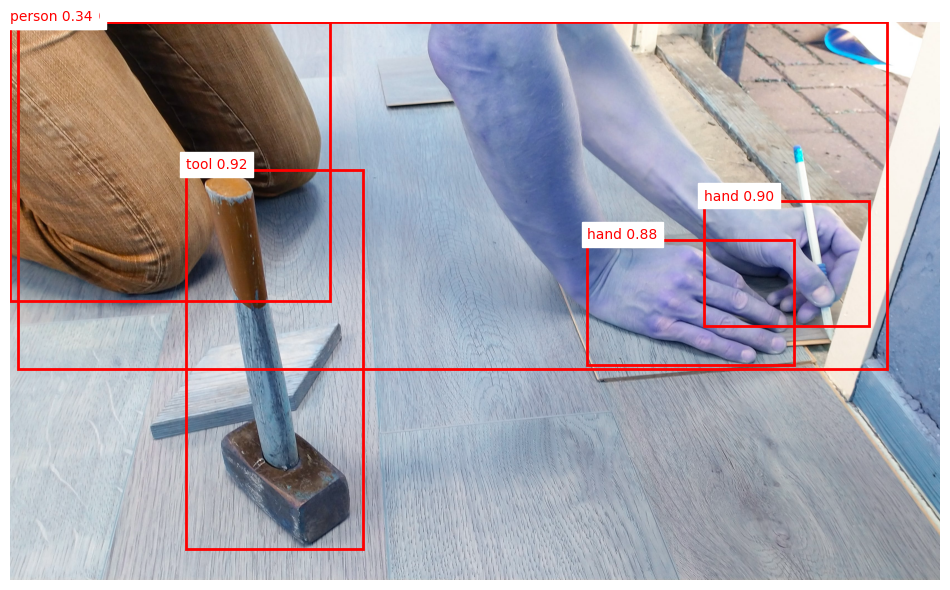

In [9]:
import matplotlib.pyplot as plt

def visualize_detections(model, image_path, conf_thresh=0.25):
    results = model.predict(image_path, conf=conf_thresh)[0]
    
    img = results.orig_img
    
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    
    boxes = results.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        conf = box.conf[0].item()
        cls = int(box.cls[0].item())
        
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        plt.gca().add_patch(rect)
        
        class_name = model.names[cls]
        label = f'{class_name} {conf:.2f}'
        plt.text(x1, y1 - 5, label, color='red', fontsize=10, backgroundcolor='white')
    
    plt.axis('off')
    plt.show()

test_images = [
    '/kaggle/input/ppe-detection-1/dataset_new/filtered_images/construction-site-build-construction-work-159375.jpeg',
    '/kaggle/input/ppe-detection-1/dataset_new/filtered_images/floor-flooring-hand-man-1388944.jpeg'
]

for img_path in test_images:
    visualize_detections(model, img_path)
